# Instancia de librarias

In [69]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as stats
import statistics


import warnings
warnings.filterwarnings('ignore')


print("Setup complete")

Setup complete


# Importación de datos

In [70]:
path = r'data/Walmart_Store_sales.csv'
wall_data = pd.read_csv(path, header=0, encoding='utf-8')

# Análisis exploratorio

In [71]:
print("Número de observaciones:", wall_data.shape[0])
print("Número de variables:", wall_data.shape[1])
print("Variables",wall_data.keys())

Número de observaciones: 6435
Número de variables: 8
Variables Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [72]:
wall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


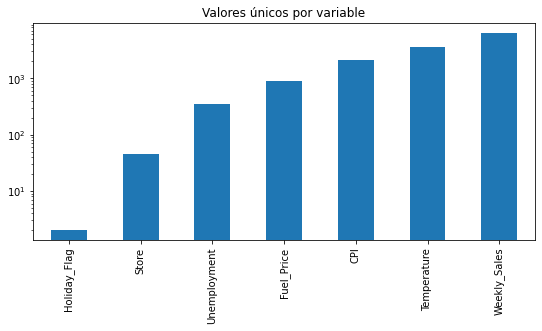

In [73]:
wall_data.value_counts(wall_data.dtypes)
unq_val = wall_data.select_dtypes(include='number').nunique().sort_values()
unq_val.plot.bar(logy=True, figsize=(9,4),title="Valores únicos por variable");


In [74]:
muestra = int(wall_data.shape[0]*.60)
wall_data.sample(10,random_state=muestra)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5306,38,21-05-2010,340497.08,0,76.20,3.120,126.184387,14.099
2441,18,16-04-2010,1135577.62,0,50.26,2.885,131.980900,9.269
5183,37,08-10-2010,524483.65,0,66.34,2.633,210.514440,8.476
897,7,05-11-2010,480512.44,0,49.44,2.729,190.996438,9.137
3194,23,07-01-2011,1122034.48,0,27.81,3.193,132.882323,5.114
4654,33,05-08-2011,242456.39,0,96.93,3.803,129.184645,8.442
3394,24,10-02-2012,1403460.87,1,33.82,3.826,137.166677,8.659
2580,19,19-03-2010,1332940.35,0,43.74,2.960,131.824290,8.350
2681,19,24-02-2012,1352470.09,0,33.91,3.917,137.341103,7.943
4674,33,23-12-2011,256235.19,0,53.39,3.541,129.984548,8.010


In [75]:
wall_data.columns = ["num_tienda","fecha","vta_semana","dia_feriado","temperatura","precio_gasolina_reg","ipc","tasa_desempleo"]

In [76]:
wall_data.head()

,num_tienda,fecha,vta_semana,dia_feriado,temperatura,precio_gasolina_reg,ipc,tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [77]:
# la temperatura esta en °F
print("Max: ",wall_data['temperatura'].max(),"Min: ",wall_data['temperatura'].min())

Max:  100.14 Min:  -2.06


In [78]:
# El precio de la gasolina por region es en galones
print("Max: ",wall_data['precio_gasolina_reg'].max(),"Min: ",wall_data['precio_gasolina_reg'].min())

Max:  4.468 Min:  2.472


In [79]:
# la temperatura se deja en °C
wall_data['temperatura'] = (wall_data['temperatura']-32)*(5/9)
wall_data['temperatura'].head()

0    5.727778
1    3.616667
2    4.405556
3    8.127778
4    8.055556
Name: temperatura, dtype: float64

In [80]:
# El precio de la gasolina se deja en Dolares
wall_data['precio_gasolina_reg'] = (wall_data['precio_gasolina_reg'] / 3.785412)
wall_data['precio_gasolina_reg'].head()

# Posiblemente se pueda consumir un api que le pase la fecha y proporcione el precio del dolar ese día

0    0.679450
1    0.673110
2    0.664129
3    0.676545
4    0.693452
Name: precio_gasolina_reg, dtype: float64

In [82]:
# fecha - Cambio de tipo str a date
# wall_data['fecha']
wall_data['fecha'] = pd.to_datetime(wall_data['fecha'],format="%d-%m-%Y", dayfirst=True)

In [83]:
wall_data['fecha'] # año - mes - dia

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: fecha, Length: 6435, dtype: datetime64[ns]

In [84]:
pd.value_counts(wall_data.dtypes)

float64           5
int64             2
datetime64[ns]    1
dtype: int64

# Corroboración de valores ausentes

In [85]:
wall_data.isna().sum()

num_tienda             0
fecha                  0
vta_semana             0
dia_feriado            0
temperatura            0
precio_gasolina_reg    0
ipc                    0
tasa_desempleo         0
dtype: int64

# Verificando periodicidad de fechas

In [100]:
# wall_data[wall_data['fecha']=="2010-05-02"] # Inicio del registro de semana viernes
# wall_data[wall_data['fecha'] == "2012-08-31"] # Registro de última semana viernes
# wall_data[wall_data['fecha'] == "2012-11-01"] # No hay registro
wall_data.groupby(['fecha']).size() # 45 (tiendas)*143 = 6435 registros

fecha
2010-02-05    45
2010-02-12    45
2010-02-19    45
2010-02-26    45
2010-03-05    45
              ..
2012-09-28    45
2012-10-05    45
2012-10-12    45
2012-10-19    45
2012-10-26    45
Length: 143, dtype: int64

In [87]:
# Días festivos
# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [88]:
# Todos los viernes de cada semana se registran ventas.
# Se puede comparar por trimestres porque empieza el primer viernes de febrero 2010 y 
# el último registro se hizo el último viernes de Octubre 2022.

# Trimestre strim
# Febrero-Marzo-Abril (2010), Mayo-Junio-Julio, Agosto-Septiembre-Octubre, Noviembre-Diciembre-Enero (2010-2011)
# Febrero-Marzo-Abril (2011), Mayo-Junio-Julio, Agosto-Septiembre-Octubre, Noviembre-Diciembre-Enero (2011-2012)
# x Febrero-Marzo-Abril (2012), Mayo-Junio-Julio, Agosto-Septiembre-Octubre (2012) x ---trim_trun---

# Bimestres bim
# Febrero-Marzo(2010), Abril-Mayo, Junio-Julio, Agosto-Septiembre, Octubre-Noviembre, Diciembre-Enero (2010-2011)
# Febrero-Marzo(2011), Abril-Mayo, Junio-Julio, Agosto-Septiembre, Octubre-Noviembre, Diciembre-Enero (2011-2012)
# x Febrero-Marzo(2012), Abril-Mayo, Junio-Julio, Agosto-Septiembre, x Octubre (2012)x


In [ ]:
# Deiniendo los periodos de tiempo por trimestre o bimestre
trim = wall_data[(wall_data['fecha'] >= '2010-02-05') & (wall_data['fecha'] <= '2012-01-27')]
bim = wall_data[(wall_data['fecha'] >= '2010-02-05') & (wall_data['fecha'] <= '2012-10-28')]
trim_trun = wall_data[(wall_data['fecha'] >= '2010-02-05') & (wall_data['fecha'] <= '2012-10-26')]

### La tienda con el máximo de ventas registradas es:

In [90]:
# wall_data.keys()
trim_trun[trim_trun['vta_semana'] == max(trim_trun['vta_semana'])]

,num_tienda,fecha,vta_semana,dia_feriado,temperatura,precio_gasolina_reg,ipc,tasa_desempleo
1905,14,2010-12-24,3818686.45,0,-0.783333,0.829764,182.54459,8.724


### La tienda con la desviación estadar máxima fue:

In [91]:
wall_data['vta_semana'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: vta_semana, dtype: float64

In [92]:
statistics.stdev(wall_data['vta_semana'])

564366.6220536975

### Las tiendas con buena tasa de crecimiento trimestral en el trimestre de 2012 (top5) son:


In [93]:
# Las tiendas con buena tasa de crecimiento trimestral en el trimestre de 2012 (top5), son:
# trim_trun.groupby(['num_tienda','fecha']).transform('sum')

# trim_trun.groupby(['fecha']).get_group('2010-02-05') 
# it's the same trim_trun[trim_trun['fecha']=='2010-02-05'] but less efficent

# trim_trun.groupby(['num_tienda','fecha','vta_semana','dia_feriado'])[['vta_semana']].aggregate([min,max,'mean'])
# trim_trun.groupby(['num_tienda','fecha','vta_semana','dia_feriado'])[['vta_semana']].count()
# trim_trun.keys()
# trim_trun[(trim_trun['fecha']>="2012-02-03") & (trim_trun['fecha']<="2012-04-27")].iloc[:,0:4]
# trim_trun[(trim_trun['fecha']>="2012-05-04") & (trim_trun['fecha']<="2012-07-27")].iloc[:,0:4]
# trim_trun[(trim_trun['fecha']>="2012-08-03") & (trim_trun['fecha']<="2012-10-26")].iloc[:,0:4]
# trim_trun_1.groupby('num_tienda')[['vta_semana']].aggregate([min,max,'mean',sum]).reset_index()


In [94]:
# Separar por trimestres para evaluar el 2012
# trim_trun_0 = trim_trun[(trim_trun['fecha']>="2011-11-04") & (trim_trun['fecha']<="2012-01-27")].iloc[:,0:4]
# trim_trun_1 = trim_trun[(trim_trun['fecha']>="2012-02-03") & (trim_trun['fecha']<="2012-04-27")].iloc[:,0:4]
# trim_trun_2 = trim_trun[(trim_trun['fecha']>="2012-05-04") & (trim_trun['fecha']<="2012-07-27")].iloc[:,0:4]
# trim_trun_3 = trim_trun[(trim_trun['fecha']>="2012-08-03") & (trim_trun['fecha']<="2012-10-26")].iloc[:,0:4]

# Funcion que separa fechas por trimestres
def trimestre (df,f1,f2):
    trim = df[(df['fecha']>=f1) & (df['fecha']<=f2)].iloc[:,0:4]
    return trim

trim_trun_0 = trimestre(trim_trun,"2011-11-04","2012-01-27")
trim_trun_1 = trimestre(trim_trun,"2012-02-03","2012-04-27")
trim_trun_2 = trimestre(trim_trun,"2012-05-04","2012-07-27")
trim_trun_3 = trimestre(trim_trun,"2012-08-03","2012-10-26")

# Obteniendo la tasa de ganancia
# x = (((trim_trun_0.groupby('num_tienda')[['vta_semana']].aggregate([sum])-\
# trim_trun_1.groupby('num_tienda')[['vta_semana']].aggregate([sum])) / \
# (trim_trun_0.groupby('num_tienda')[['vta_semana']].aggregate([sum]))) * 100 ).reset_index()
# x
# x['num_tienda']
# x['vta_semana']
# y = pd.DataFrame(x['vta_semana'],x['vta_semana'])
# len(x['vta_semana'] ) == len(x['vta_semana'])

# y = pd.DataFrame()
# y['trim_0']=x['vta_semana']
# y['trim_1']=x['vta_semana']
# y

def tasa_ganancia (trem0,trem1):
    tg = (((trem0.groupby('num_tienda')[['vta_semana']].aggregate([sum])-\
            trem1.groupby('num_tienda')[['vta_semana']].aggregate([sum])) / \
           (trem0.groupby('num_tienda')[['vta_semana']].aggregate([sum]))) * 100 ).reset_index()
    return tg

tg_s1_2012 = tasa_ganancia(trim_trun_0,trim_trun_1)
tg_s2_2012 = tasa_ganancia(trim_trun_1,trim_trun_2)
tg_s3_2012 = tasa_ganancia(trim_trun_2,trim_trun_3)

def df_tasa (a,b,c,tg1,tg2,tg3):
    df = pd.DataFrame()
    df['tienda'] = range(1,46,1)
    df[a]=tg1['vta_semana']
    df[b]=tg2['vta_semana']
    df[c]=tg3['vta_semana']
    return df
tasa_crec_2012 = df_tasa('trim_1','trim_2','trim_3',tg_s1_2012,tg_s2_2012,tg_s3_2012)
# tasa_crec_2012

In [95]:
# # tasa_crec_2012.groupby('tienda').aggregate([max])

# tasa_crec_2012.groupby('tienda')[['trim_1']].aggregate([min])
# tasa_crec_2012.groupby('trim_1')[['tienda']].min()
# tasa_crec_2012.sort_values(by=['trim_1','trim_2','trim_3'], ascending=False)

# tasa_crec_2012.iloc[:,:].sort_values(by = ['trim_1','trim_2','trim_3'],ascending=[False,False,False])

# tasa_crec_2012.iloc[:,[0,1]].sort_values(by='trim_1', ascending=False)
# tasa_crec_2012.iloc[:,[0,2]].sort_values(by='trim_2', ascending=False)
# tasa_crec_2012.iloc[:,[0,3]].sort_values(by='trim_3', ascending=False)

tasa_crec_2012_1 = tasa_crec_2012.iloc[:,[0,1]].sort_values(by='trim_1', ascending=False)
tasa_crec_2012_2 = tasa_crec_2012.iloc[:,[0,2]].sort_values(by='trim_2', ascending=False)
tasa_crec_2012_3 = tasa_crec_2012.iloc[:,[0,3]].sort_values(by='trim_3', ascending=False)

In [96]:
tasa_crec_2012_1.reset_index(drop=True, inplace=True)
tasa_crec_2012_2.reset_index(drop=True, inplace=True)
tasa_crec_2012_3.reset_index(drop=True, inplace=True)

tiendas_crec_trime = pd.concat([tasa_crec_2012_1,tasa_crec_2012_2,tasa_crec_2012_3],axis=1)
tiendas_crec_trime
tiendas_crec_trime.head(5)


# Fuentes de información
# Definición de la tabla
# https://www.statology.org/cbind-in-python/



,tienda,trim_1,tienda,trim_2,tienda,trim_3
0,16,18.801526,28,9.743405,14,9.625852
1,25,17.797406,12,8.986071,15,8.496627
2,15,17.604092,10,7.999261,7,8.492094
3,7,16.294563,14,7.216201,45,7.584280
4,35,15.038587,21,6.502043,6,7.403839


In [97]:
# comp_tasas_trim_2012 = pd.concat([tasa_crec_2012_1.iloc[:,[0]],tasa_crec_2012_1.iloc[:,[1]],\
#                                tasa_crec_2012_2.iloc[:,[1]],\
#                                tasa_crec_2012_3.iloc[:,[1]]],axis=1)
# comp_tasas_trim_2012

# comp_tasas_trim_2012.insert(2, "tienda",tasa_crec_2012_2.iloc[:,[0]] , True)
# comp_tasas_trim_2012.insert(4, "tienda",tasa_crec_2012_3.iloc[:,[0]] , True)
# comp_tasas_trim_2012

# tasa_crec_2012_1.iloc[:,[0]]
# tasa_crec_2012_1.iloc[:,[1]]
# tasa_crec_2012.loc[:,{'tienda','trim_2'}]
# tasa_crec_2012.iloc[:,[0,2]]
# tasa_crec_2012.loc[:,].sort_values(by='trim_1', ascending=False)

In [98]:
# Algunas festividades tienen un impacto negativo en las ventas. 
# Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada 
# no festiva para todas las tiendas juntas


In [ ]:
# tiendas_crec_trime[tiendas_crec_trime['tienda']==15]
# tg_s1_2012[tg_s1_2012['num_tienda']==15] #-> 17.6040
# tg_s2_2012[tg_s2_2012['num_tienda']==15] #-> -9.969296
tg_s3_2012[tg_s3_2012['num_tienda']==15] #-> 8.496627

In [ ]:

# tiendas_crec_trime[tiendas_crec_trime['tienda']==16] #-> Error cannot reindex on an axis with duplicate labels
# tiendas_crec_trime.groupby(['tienda']) #->Grouper for 'tienda' not 1-dimensional

# tiendas_crec_trime.iloc[:,[0,1]].groupby(['tienda']).get_group(16)
# tiendas_crec_trime.iloc[:,[2,3]]
# tiendas_crec_trime.iloc[:,[4,5]]

# tiendas_crec_trime.iloc[:,[0,1]].groupby(['tienda']).get_group(16).iloc[0,1]

# tiendas_crec_trime.iloc[:,[0,1]].groupby(['tienda']).get_group(16).iloc[0,1] + tiendas_crec_trime.iloc[:,[2,3]].groupby(['tienda']).get_group(16).iloc[0,1] +\
# tiendas_crec_trime.iloc[:,[4,5]].groupby(['tienda']).get_group(16).iloc[0,1]

# a = pd.DataFrame(columns=['num_store', 'rate_sem_2012'])
# new_row = {'num_store':"sd",
#           'rate_sem_2012':12.344}
# a = a.append(new_row, ignore_index=True)
# a
# new_row = {'num_store':"asda",
#           'rate_sem_2012':254.23}
# a = a.append(new_row, ignore_index=True)
# a

rate_store = pd.DataFrame(columns=['num_store', 'rate_sem_2012'])
for n in range (1,46,1):
    tasa_tienda = tiendas_crec_trime.iloc[:,[0,1]].groupby(['tienda']).get_group(n).iloc[0,1] +\
    tiendas_crec_trime.iloc[:,[2,3]].groupby(['tienda']).get_group(n).iloc[0,1] +\
    tiendas_crec_trime.iloc[:,[4,5]].groupby(['tienda']).get_group(n).iloc[0,1]
    new_row = {'num_store':n,'rate_sem_2012':tasa_tienda}
    rate_store = rate_store.append(new_row,ignore_index=True)
    # print(n,tasa_tienda)
rate_store.sort_values(by = 'rate_sem_2012',ascending= False)
    



In [ ]:
df.quarte()

In [ ]:
# Las número 7 y 15 tienen un mejor desempeño despues de las festividades
# de fin de año y durate el mes del Super Bowl (febrero) y Labor Day (septiembre).
# El trimestre con mejor tasa fue el de febrero - abril y fue aumentando el trimestre  agosto - septiembre que coincide con regreso a 
# las actividades escolares. También, el compartamiento de la tasa empieza con un maximo  en el primer semestre, cae durante el segundo trimestre
# y comienza a recuperarse en el tercer trimestre especto al primer trimestre.